In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.optimize import minimize
from scipy.optimize import curve_fit
from scipy.stats import t
from scipy import stats

#Per fare dei bei grafici che si leggano
plt.rcParams.update({'font.size':14})

#Dataframe stocks
df_WEC = pd.read_csv("WEC.N.csv")
df_JNJ = pd.read_csv("JNJ.N.csv")
df_QCOM = pd.read_csv("QCOM.OQ.csv")
df_TDY = pd.read_csv("TDY.N.csv")
df_PEP = pd.read_csv("PEP.OQ.csv")

#Dataframe S&P500
df_SPX = pd.read_csv("SPX.csv")

## Punto 1


La prima parte si concentra sul data anlysis del campione, in particolare cerchiamo di capire quanti Nan ci sono e se si può fare dell'inferenza per capire come sostituire i valori.\
Controllo se ci sono Nan in ogni data set e visualizzo vari dati sul campione.

In [2]:
print("WEC Dataset\n")
print(df_WEC.info(),df_WEC.describe())
print("\nJNJ Dataset\n")
print(df_JNJ.info(),df_JNJ.describe())
print("\nQCOM Dataset\n")
print(df_QCOM.info(),df_QCOM.describe())
print("\nTDY Dataset\n")
print(df_TDY.info(),df_TDY.describe())
print("\nPEP Dataset\n")
print(df_PEP.info(),df_PEP.describe())


WEC Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            251 non-null    int64  
 1   Instrument            251 non-null    object 
 2   Date                  251 non-null    object 
 3   1 Month Total Return  251 non-null    float64
 4   Company Market Cap    251 non-null    float64
 5   Price Close           251 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 11.9+ KB
None        Unnamed: 0  1 Month Total Return  Company Market Cap  Price Close
count  251.000000            251.000000        2.510000e+02   251.000000
mean   125.000000              1.172101        1.498314e+10    51.694681
std     72.601653              4.611845        9.915640e+09    28.445197
min      0.000000            -13.569150        3.712649e+09    15.700000
25%     62.500000             -1.690880   

In [3]:
#Converto le date in un formato leggibile 
df_WEC['Date'] = pd.to_datetime(df_WEC['Date']).dt.date
df_JNJ['Date'] = pd.to_datetime(df_JNJ['Date']).dt.date
df_QCOM['Date'] = pd.to_datetime(df_QCOM['Date']).dt.date
df_TDY['Date'] = pd.to_datetime(df_TDY['Date']).dt.date
df_PEP['Date'] = pd.to_datetime(df_PEP['Date']).dt.date

Ora avendo constatato che non vi sono particolari problemi con i dati dei vari campioni si può passare a fare dei grafici.

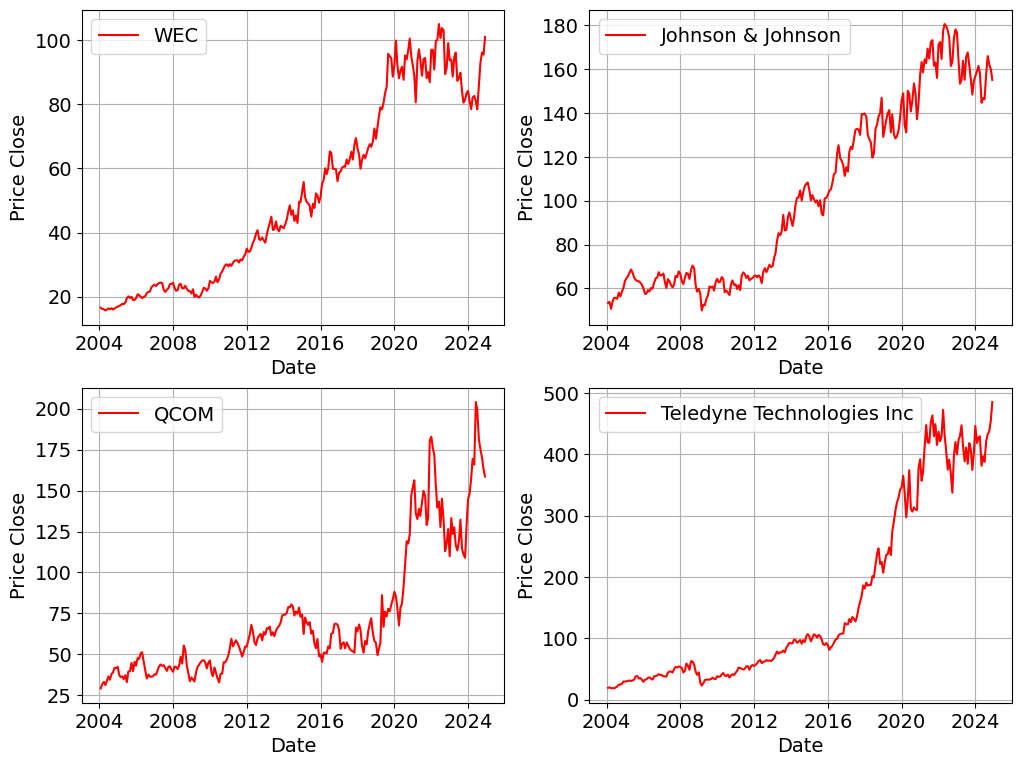

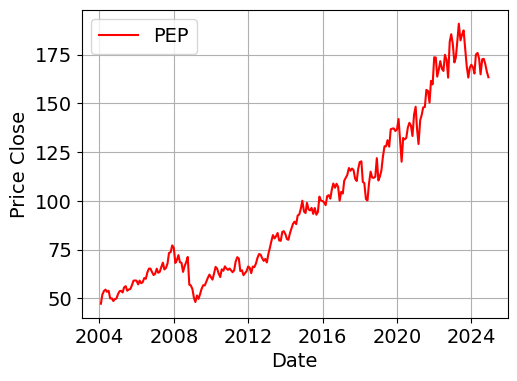

In [4]:
f, axes = plt.subplots(2, 2,figsize=(12,9))
sns.lineplot(x="Date",y="Price Close",data=df_WEC, ax=axes[0,0],c="r",label="WEC")
sns.lineplot(x="Date",y="Price Close",data=df_JNJ, ax=axes[0,1],c="r",label="Johnson & Johnson")
sns.lineplot(x="Date",y="Price Close",data=df_QCOM, ax=axes[1,0],c="r",label="QCOM")
sns.lineplot(x="Date",y="Price Close",data=df_TDY, ax=axes[1,1],c="r",label="Teledyne Technologies Inc")
#axes[1,0].tick_params(rotation=0)
axes[1,0].grid()
axes[0,1].grid()
axes[0,0].grid()
plt.tight_layout
plt.grid()
plt.figure(figsize=(5.5,4))
sns.lineplot(x="Date",y="Price Close",data=df_PEP,c="r",label="PEP")
plt.grid()
plt.tight_layout
#plt.xticks(rotation=0)
plt.legend()

Creo un dataframe contenente il Close Price delle stock.

In [5]:
df_price_close= pd.DataFrame({"Close PEP":df_PEP["Price Close"].values})
df_price_close["Close TDY"] = df_TDY["Price Close"].values
df_price_close["Close WEC"] = df_WEC["Price Close"].values
df_price_close["Close JNJ"] = df_JNJ["Price Close"].values
df_price_close["Close QCOM"] = df_QCOM["Price Close"].values

Creo un dataframe contenente i 1 month returns delle stocks.

In [6]:
df_return_month = pd.DataFrame({"Monthly Return PEP":df_PEP["1 Month Total Return"].values})
df_return_month["Monthly Return TDY"] = df_TDY["1 Month Total Return"].values
df_return_month["Monthly Return WEC"] = df_WEC["1 Month Total Return"].values
df_return_month["Monthly Return JNJ"] = df_JNJ["1 Month Total Return"].values
df_return_month["Monthly Return QCOM"] = df_QCOM["1 Month Total Return"].values

Ora è interessante visuallizzare la correlazione tra le varie stock sia per il close price, sia per il monthly average return.

Matrici di covaranza e correlazione per il close price e matrici inverse

In [7]:
cov_close = df_price_close.cov(numeric_only=True).values
corr_close = df_price_close.corr(numeric_only=True).values
inv_corr_close = np.linalg.inv(corr_close)
inv_cov_close = np.linalg.inv(cov_close)

Matrici di covaranza e correlazione per il monthly e matrici inverse

In [8]:
cov_mon = df_return_month.cov(numeric_only=True).values
corr_mon = df_return_month.corr(numeric_only=True).values
inv_corr_mon = np.linalg.inv(df_return_month.corr(numeric_only=True).values)
inv_cov_mon = np.linalg.inv(cov_mon)

Heat maps per visualizzare le matrici di correlazione

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

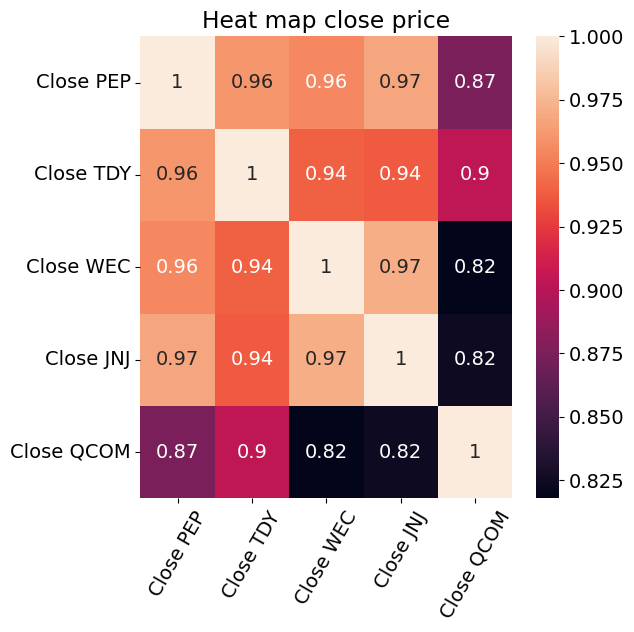

In [9]:
plt.figure(figsize=(6,6))
plt.title("Heat map close price")
sns.heatmap(df_price_close.corr(numeric_only=True),annot=True)
plt.xticks(rotation=60)
plt.tight_layout

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

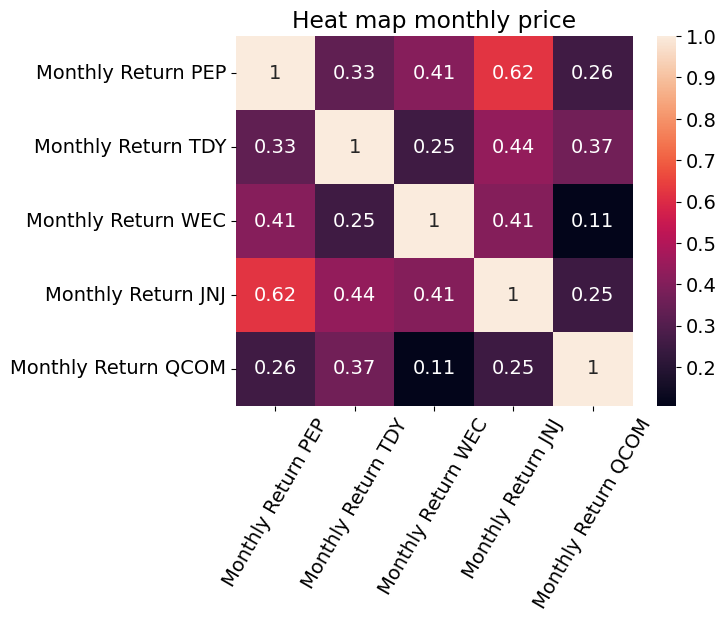

In [10]:
plt.title("Heat map monthly price")
sns.heatmap(df_return_month.corr(numeric_only=True),annot=True)
plt.xticks(rotation=60)
plt.tight_layout

## Punto 2

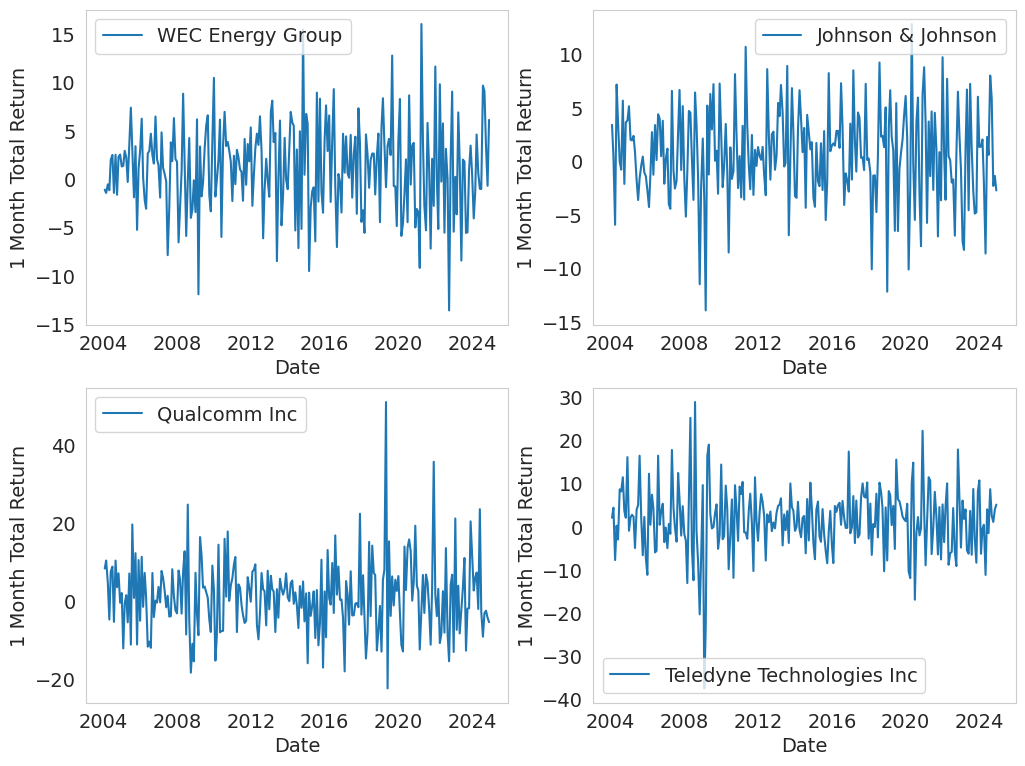

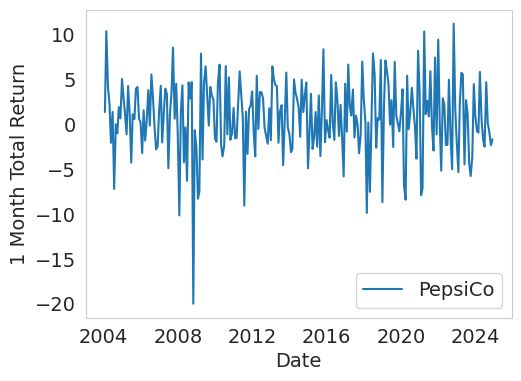

In [34]:
f, axes = plt.subplots(2, 2,figsize=(12,9))
sns.lineplot(x="Date",y="1 Month Total Return",data=df_WEC, ax=axes[0,0],label="WEC Energy Group")
sns.lineplot(x="Date",y="1 Month Total Return",data=df_JNJ, ax=axes[0,1],label="Johnson & Johnson")
sns.lineplot(x="Date",y="1 Month Total Return",data=df_QCOM, ax=axes[1,0],label="Qualcomm Inc")
sns.lineplot(x="Date",y="1 Month Total Return",data=df_TDY, ax=axes[1,1],label="Teledyne Technologies Inc")
axes[1,0].tick_params(rotation=0)
axes[1,0].grid()
axes[0,1].grid()
axes[0,0].grid()
plt.tight_layout
plt.grid()
plt.figure(figsize=(5.5,4))
sns.lineplot(x="Date",y="1 Month Total Return",data=df_PEP,label="PepsiCo")
#plt.axhline(df_PEP["1 Month Total Return"],c="r")
plt.grid()
plt.tick_params(rotation=0)
plt.tight_layout
plt.legend()

<Axes: ylabel='Count'>

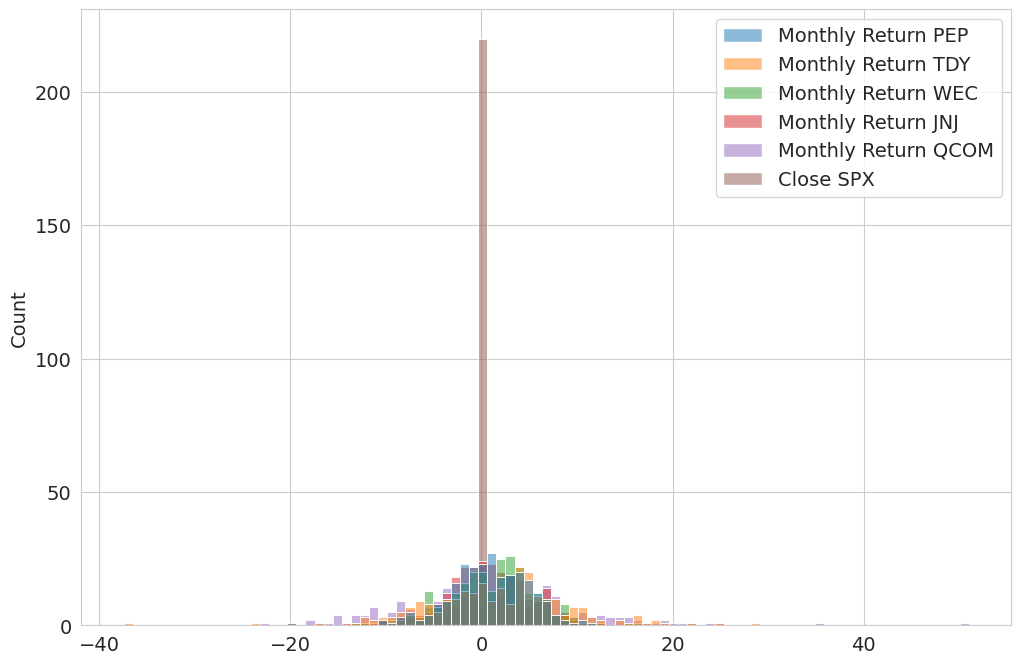

In [35]:
plt.figure(figsize=(12,8))
sns.histplot(data=df_return_month)

Per fare il moving average posso utilizzare una funzione di pandas che mi fa direttamente il calcolo, la documentazione a riguardo dice che.....

/tmp/ipykernel_12508/3896045492.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.lineplot(data=ema_df).set_xticklabels(["",  "2004", "2008", "2012", "2016", "2020", "2024"])


Text(0, 0.5, 'Exponential Moving Average')

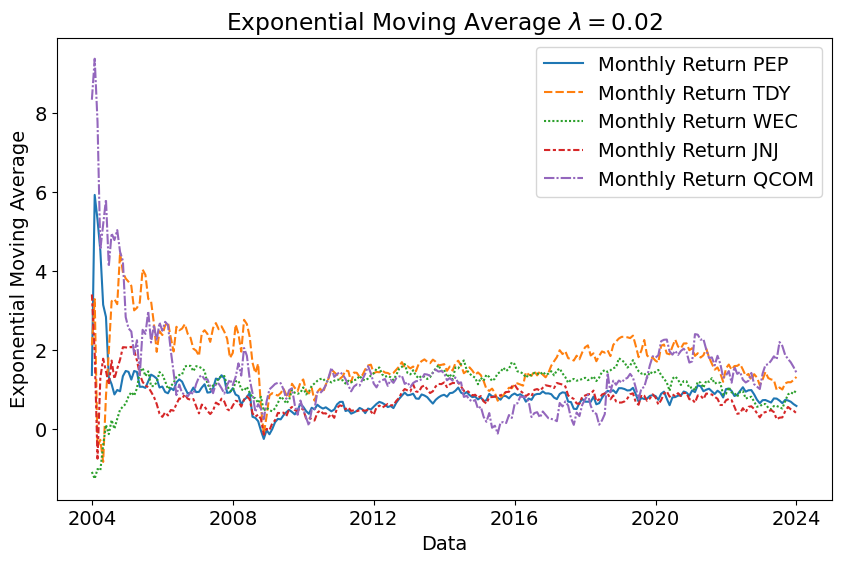

In [13]:
lam = 0.02
ema_df = df_return_month.ewm(alpha=lam).mean()
plt.figure(figsize=(10,6))
plt.title(r"Exponential Moving Average $\lambda = 0.02$")
sns.lineplot(data=ema_df).set_xticklabels(["",  "2004", "2008", "2012", "2016", "2020", "2024"])
plt.xlabel("Data")
plt.ylabel("Exponential Moving Average")

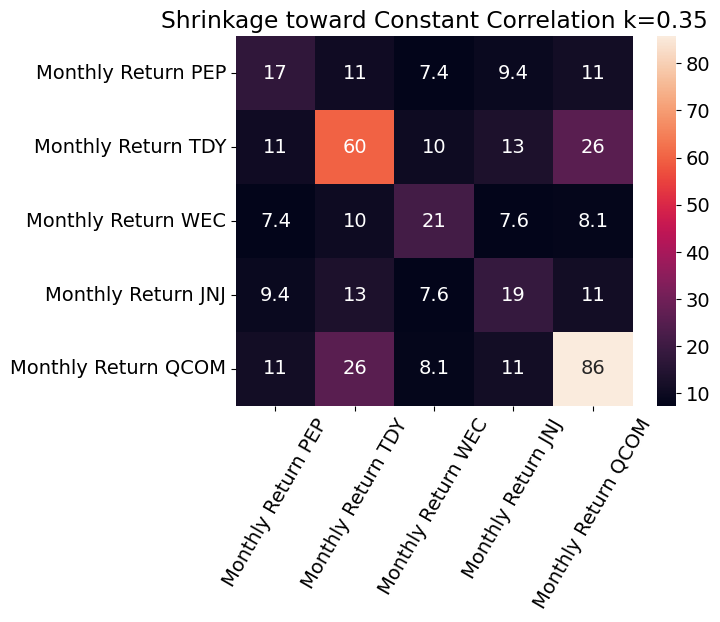

In [14]:
# Calcoliamo la corelazione media
avg_corr = (np.sum(corr_mon) - len(corr_mon)) / (len(corr_mon) * (len(corr_mon) - 1))

# Matrice di correlazione costante
const_corr = np.full(corr_mon.shape, avg_corr)
np.fill_diagonal(const_corr, 1)

# Shrinkage covariance matrix
k = 0.35
shrinkage_cov = k * (np.outer(np.sqrt(np.diag(cov_mon)), np.sqrt(np.diag(cov_mon))) * const_corr) + (1 - k) * cov_mon

shrinkage_cov = pd.DataFrame(shrinkage_cov, index=df_return_month.columns, columns=df_return_month.columns)
plt.title("Shrinkage toward Constant Correlation k=0.35")
plot = sns.heatmap(shrinkage_cov,annot=True)
plt.tick_params(axis="x",rotation=60)
plt.tight_layout
plt.show()

## Punto 3

Sappiamo dalla teoria di markovitz senza risk free che
$$\mu_p = \sum_i w_i\mu_i\,,\quad \sigma^2_p = \sum_{i,j}\sigma_{ij} w_i w_j\,,$$
Ora posso definire un lagrangiana $\mathcal{L}$ tale che questa sia minimizzata da un certo $w^*$ (se esiste un minimo)

Dopo di che i vari valori della lagrangiana possono essere scoperti, a questo punto posso trovare un legame tra la volatilità e il rendimento atteso, da cui posso trovare il portafoglio a minima varianza \
L'equazione per il frontiera efficace (Markovitz bullet) è data da 
$$\sigma^2_p = \frac{D\mu_p^2-2B\mu_p+A}{det(M)}\,,$$

$$w^i = \sigma^{ik}\left(\frac{D\mu_p-B}{\det(M)} \mu_k + \frac{A-B\mu_p}{\det(M)} e_k\right)$$

$$
        \lambda = \frac{D\mu_p-B}{\det(M)}\,,\quad
        \gamma = \frac{A-B\mu_p}{\det(M)}\,,
$$
$$
D= \sigma^{ij}e_i e_j\,,\quad B = \sigma^{ij}e_i \mu_j\,, \quad A = \sigma^{ij}\mu_i \mu_j\,, \quad \det(M) = DA-B^2
        $$
With $e=(1,\dots,1)$

In [15]:
Rf = 0.03 #0.03 == annual risk-free return
Rf_mon = (1+Rf)**(1/12)-1 # ritorno risk-free mensile

mu = df_return_month.mean().to_numpy()

# mu_p è l'expected return del portafoglio, mentre mu dei singoli assets
mu_p = np.dot(inv_cov_mon, mu)

e = np.ones(len(mu_p))
A = inv_cov_mon @ mu @ mu
B = inv_cov_mon @ mu @ e
D = inv_cov_mon @ e @ e
det = A*D - B*B

# w sono i pesi del portafoglio ottimale, massimizando lo sharp ratio.
norm = np.sum(mu_p)
w = mu_p/B

wf = 1 - w@e

print("Pesi portforlio ottimale:", w,"somma w: ",sum(w))

Pesi portforlio ottimale: [ 0.20825531  0.21966803  0.60166139 -0.11487859  0.08529386] somma w:  1.0000000000000002


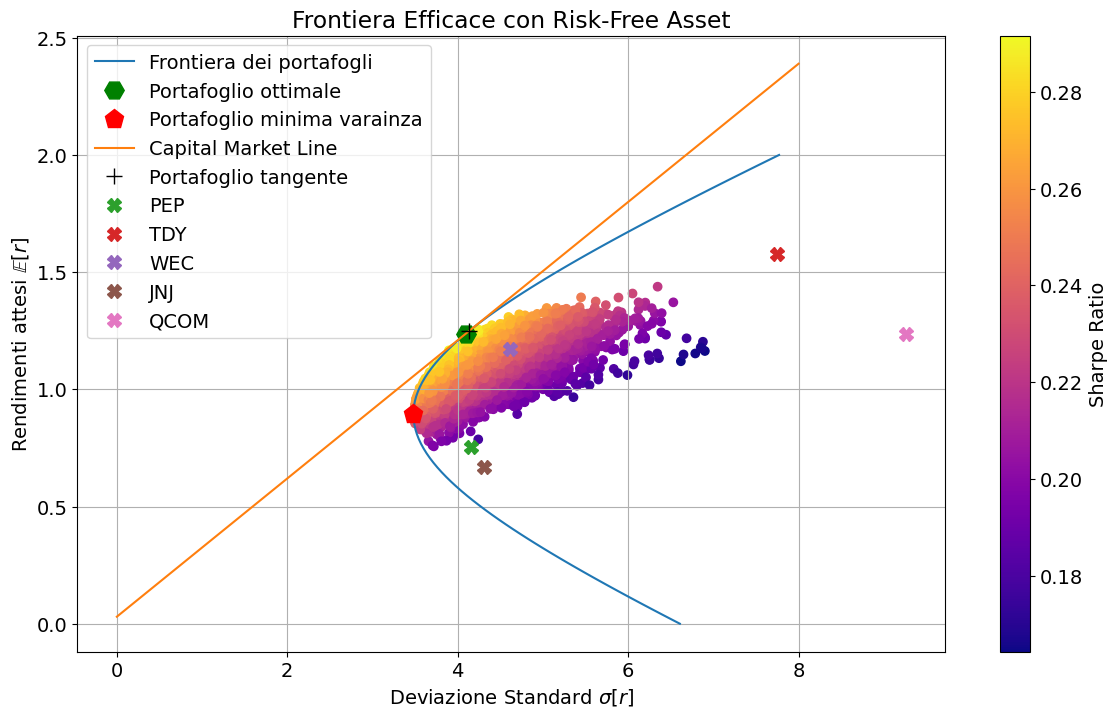

In [16]:
mu_var = np.linspace(0,2,100) 
sigma_var = np.linspace(0,8,100)

mu_opt = mu@w
sigma_opt = np.sqrt(cov_mon @ w @ w)

mu_bullet = []
sigma_bullet = []

for i in range(5000):
    random_weight = np.random.uniform(0, 1, 5)
    random_weight /= np.sum(random_weight)
    mu_bullet.append(random_weight@mu)
    sigma_bullet.append(np.sqrt(cov_mon@random_weight@random_weight))

sharp_ratio = (mu_bullet-Rf*np.ones(len(mu_bullet)))/sigma_bullet

plt.figure(figsize=(14,8))
plt.title("Frontiera Efficace con Risk-Free Asset")

scatter = plt.scatter(x=sigma_bullet, y=mu_bullet, cmap='plasma', c=sharp_ratio)
plt.plot(np.sqrt((D*mu_var**2-2*B*mu_var+A)/det),mu_var,label = "Frontiera dei portafogli")
plt.plot(sigma_opt, mu_opt, color="g", marker="H", markersize=14,ls='', label = "Portafoglio ottimale")

plt.plot(np.sqrt(1/D),B/D, markersize=14, marker = "p",c="r",ls='', label = "Portafoglio minima varainza")
plt.plot(sigma_var,Rf+np.sqrt(A + Rf*(D*Rf-2*B))*sigma_var, label= "Capital Market Line")
plt.plot(np.sqrt(A+Rf*(-2*B+D*Rf))/np.abs(B-D*Rf),Rf + (A+Rf*(-2*B+D*Rf))/np.abs(B-D*Rf),ls='',markersize=12,marker ="+",c="k", label= "Portafoglio tangente")

plt.plot(np.sqrt(cov_mon[0,0]),mu[0], marker="X", markersize=10,ls='',label="PEP")
plt.plot(np.sqrt(cov_mon[1,1]),mu[1], marker="X", markersize=10,ls='',label="TDY")
plt.plot(np.sqrt(cov_mon[2,2]),mu[2], marker="X", markersize=10,ls='',label="WEC")
plt.plot(np.sqrt(cov_mon[3,3]),mu[3], marker="X", markersize=10,ls='',label="JNJ")
plt.plot(np.sqrt(cov_mon[4,4]),mu[4], marker="X", markersize=10,ls='',label="QCOM")


# Creo una colorbar per il S.R.
cbar = plt.colorbar(scatter)
cbar.set_label("Sharpe Ratio")

plt.xlabel(r"Deviazione Standard $\sigma[r]$")
plt.ylabel(r"Rendimenti attesi $\mathbb{E}[r] $")

plt.legend()
plt.grid(True)
plt.show()

#### Mostro i pesi dei vari portafogli

/tmp/ipykernel_12508/829607639.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.barplot(w,edgecolor="k",linewidth=1.5 ).set_xticklabels(["PEP"  , "TDY"  , "WEC"  , "JNJ"  , "QCOM"])


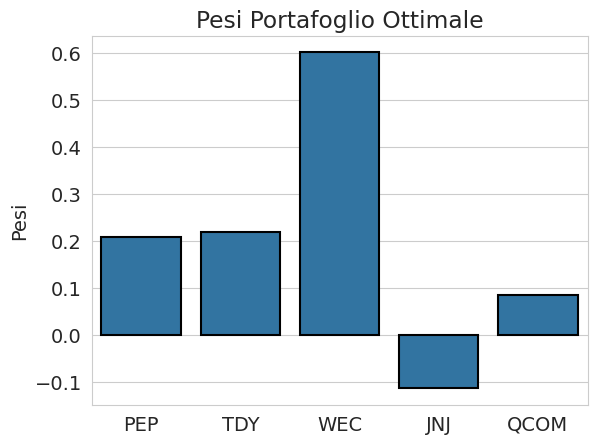

/tmp/ipykernel_12508/829607639.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.barplot(w_minVar,edgecolor="k",linewidth=1.5 ).set_xticklabels(["PEP"  , "TDY"  , "WEC"  , "JNJ"  , "QCOM"])


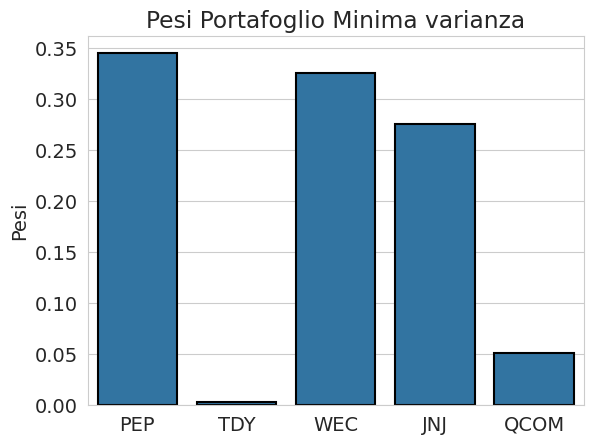

/tmp/ipykernel_12508/829607639.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.barplot(w_tg,edgecolor="k",linewidth=1.5 ).set_xticklabels(["PEP"  , "TDY"  , "WEC"  , "JNJ"  , "QCOM"])


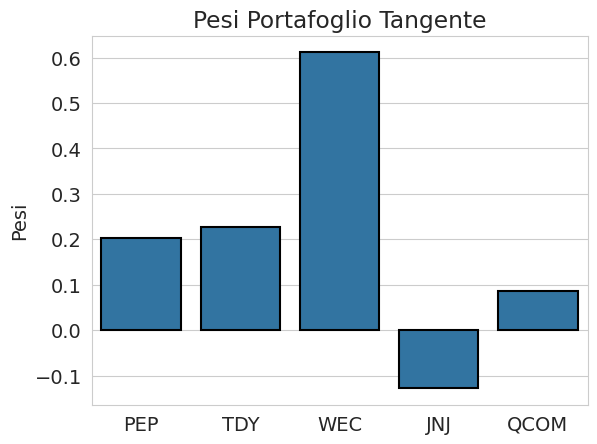

B/D > Rf: 0.8939605951539228 0.03


In [17]:
w_minVar = inv_cov_mon@e/D
mu_t = Rf + (A+Rf*(-2*B+D*Rf))/np.abs(B-D*Rf)
w_tg = inv_cov_mon@((D*mu_t-B)*mu+(A-mu_t*B)*e)/det

sns.set_style("whitegrid")

plt.title("Pesi Portafoglio Ottimale")
plt.ylabel("Pesi")
sns.barplot(w,edgecolor="k",linewidth=1.5 ).set_xticklabels(["PEP"  , "TDY"  , "WEC"  , "JNJ"  , "QCOM"])
plt.show()

plt.title("Pesi Portafoglio Minima varianza")
plt.ylabel("Pesi")
sns.barplot(w_minVar,edgecolor="k",linewidth=1.5 ).set_xticklabels(["PEP"  , "TDY"  , "WEC"  , "JNJ"  , "QCOM"])
plt.show()

plt.title("Pesi Portafoglio Tangente")
plt.ylabel("Pesi")
sns.barplot(w_tg,edgecolor="k",linewidth=1.5 ).set_xticklabels(["PEP"  , "TDY"  , "WEC"  , "JNJ"  , "QCOM"])
plt.show()

print("B/D > Rf:",B/D,Rf)

## Punto 4

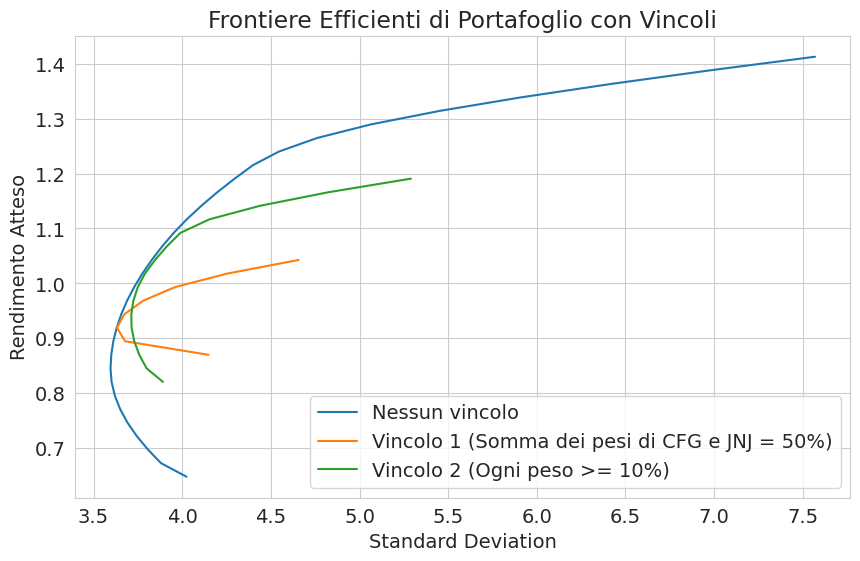

In [18]:
dfs = {
    'PEP': df_PEP,
    'JNJ': df_JNJ,
    'QCOM': df_QCOM,
    'TDY': df_TDY,
    'WEC': df_WEC,
}


# Preparo il DataFrame returns con i ritorni mensili
returns = pd.DataFrame()
returns['PEP'] = dfs['PEP']['1 Month Total Return']
returns['JNJ'] = dfs['JNJ']['1 Month Total Return']
returns['QCOM'] = dfs['QCOM']['1 Month Total Return']
returns['TDY'] = dfs['TDY']['1 Month Total Return']
returns['WEC'] = dfs['WEC']['1 Month Total Return']
returns['SP500'] = df_SPX['1 Month Total Return']

# Rimuovo eventuali valori nulli
returns = returns.dropna()

# Estraggo media e matrice covarianze
mean_returns = returns[['PEP', 'JNJ', 'QCOM', 'TDY', 'WEC']].mean()
cov_matrix = returns[['PEP', 'JNJ', 'QCOM', 'TDY', 'WEC']].cov()

# Controllo su media e matrice covarianze
if mean_returns.isnull().any() or cov_matrix.isnull().values.any():
    raise ValueError("Mean returns or covariance matrix contains NaN values. Check the input data.")

# Calcolo portafoglio
def portfolio_return(w, mean_returns):
    return np.dot(w, mean_returns)

def portfolio_volatility(w, cov_matrix):
    return np.sqrt(np.dot(w.T, np.dot(cov_matrix, w)))

def negative_sharpe_ratio(w, mean_returns, cov_matrix, Rf_mon):
    p_return = portfolio_return(w, mean_returns)
    p_volatility = portfolio_volatility(w, cov_matrix)
    return -(p_return - Rf_mon) / p_volatility

def optimize_portfolio(mean_returns, cov_matrix, Rf_mon, constraints):
    num_assets = len(mean_returns)
    bounds = [(0.0, 1.0) for _ in range(num_assets)]
    initial_weights = np.array([1.0 / num_assets] * num_assets)

    options = {'maxiter': 500}

    result = minimize(
        negative_sharpe_ratio,
        initial_weights,
        args=(mean_returns, cov_matrix, Rf_mon),
        method='SLSQP',
        bounds=bounds,
        constraints=constraints,
        options=options
    )
    return result if result.success else None

# VIncoli
no_constraint = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}
constraint_1 = {'type': 'eq', 'fun': lambda x: x[0] + x[1] - 0.5}
constraint_2 = {'type': 'ineq', 'fun': lambda x: x - 0.1}

constraints_set = [
    [no_constraint],
    [no_constraint, constraint_1],
    [no_constraint, constraint_2]
]

# Frontiera efficiente
frontiers = []

for constraints in constraints_set:
    frontier_returns = []
    frontier_volatilities = []
    target_returns = np.linspace(mean_returns.min() * 0.8, mean_returns.max() * 1.2, 50)

    for target in target_returns:
        target_constraint = {'type': 'eq', 'fun': lambda x: portfolio_return(x, mean_returns) - target}
        result = optimize_portfolio(mean_returns, cov_matrix, Rf_mon, constraints + [target_constraint])

        if result is not None:
            weights = result.x
            frontier_returns.append(portfolio_return(weights, mean_returns))
            frontier_volatilities.append(portfolio_volatility(weights, cov_matrix))
        else:
            frontier_returns.append(np.nan)
            frontier_volatilities.append(np.nan)

    frontiers.append((np.array(frontier_volatilities), np.array(frontier_returns)))

# Plot frontiera efficiente
plt.figure(figsize=(10, 6))
labels = ['Nessun vincolo', 'Vincolo 1 (Somma dei pesi di CFG e JNJ = 50%)', 'Vincolo 2 (Ogni peso >= 10%)']

for frontier, label in zip(frontiers, labels):
    vol, ret = frontier
    vol = vol[~np.isnan(vol)]
    ret = ret[~np.isnan(ret)]
    plt.plot(vol, ret, label=label)

plt.title('Frontiere Efficienti di Portafoglio con Vincoli')
plt.xlabel('Standard Deviation')
plt.ylabel('Rendimento Atteso')
plt.legend()
plt.grid(True)
plt.show()

## Punto 5

Risultati CAPM Alpha and Beta
         Alpha      Beta
PEP   0.242325  2.876548
JNJ   0.152227  2.934156
QCOM  0.252579  5.087020
TDY   0.381326  6.480871
WEC   0.712933  2.759866


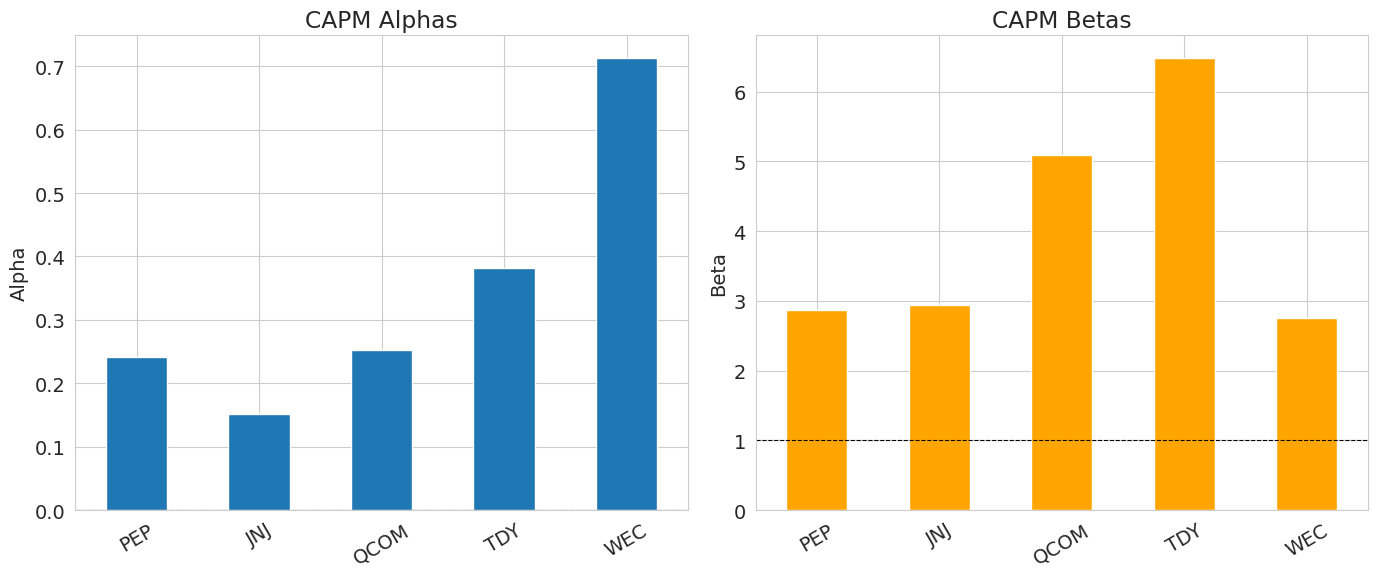


Stocks che hanno generato un Alpha positivo:
         Alpha      Beta
PEP   0.242325  2.876548
JNJ   0.152227  2.934156
QCOM  0.252579  5.087020
TDY   0.381326  6.480871
WEC   0.712933  2.759866


In [19]:
# Tasso Risk-Free annuale e mensile
rf_annual = 0.02
rf_monthly = (1 + rf_annual) ** (1 / 12) - 1

# Calcolo Alpha e Beta per ciascun titolo
alpha_beta_results = {}
stocks = ['PEP', 'JNJ', 'QCOM', 'TDY', 'WEC']

for stock in stocks:
    stock_excess = returns[stock] - rf_monthly
    market_excess = returns['SP500'] - rf_monthly

    # Calcolo Beta
    beta = np.cov(stock_excess, market_excess)[0, 1] / np.var(market_excess)

    # Calcolo Alpha
    alpha = np.mean(stock_excess) - beta * np.mean(market_excess)

    # Salvo i risultati
    alpha_beta_results[stock] = {
        'Alpha': alpha,
        'Beta': beta
    }

# Converto i risultati in DataFrame
alpha_beta_df = pd.DataFrame(alpha_beta_results).T

# Stampo i risultati
print("Risultati CAPM Alpha and Beta")
print(alpha_beta_df)

# Plot dei risultati
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Grafico Alpha
alpha_beta_df['Alpha'].plot(kind='bar', ax=ax[0], title='CAPM Alphas')
ax[0].set_ylabel('Alpha')
ax[0].axhline(0, color='black', linewidth=0.8, linestyle='--')
ax[0].tick_params(axis = "x",rotation=30)

# Grafico Beta
alpha_beta_df['Beta'].plot(kind='bar', ax=ax[1], title='CAPM Betas', color='orange')
ax[1].set_ylabel('Beta')
ax[1].axhline(1, color='black', linewidth=0.8, linestyle='--')
ax[1].tick_params(axis = "x",rotation=30)

plt.tight_layout()
plt.show()

# Titoli con Alpha positivo
positive_alphas = alpha_beta_df[alpha_beta_df['Alpha'] > 0]
print("\nStocks che hanno generato un Alpha positivo:")
print(positive_alphas)


## Punto 6

## 1) Rendimenti Impliciti: 

In [20]:
# Includo S&P 500 nei calcoli
df_return_month["Close SPX"] = df_SPX["1 Month Total Return"].values
cov_mon = df_return_month.cov(numeric_only=True).values

inv_cov_mon = np.linalg.inv(cov_mon)

mu = df_return_month.mean().to_numpy()

# mu_p è l'expected return del portafoglio, mentre mu dei singoli assets
mu_p = np.dot(inv_cov_mon, mu)

e = np.ones(len(mu_p))
A = inv_cov_mon @ mu @ mu
B = inv_cov_mon @ mu @ e
D = inv_cov_mon @ e @ e

# w sono i pesi del portafoglio ottimale, massimizando lo sharp ratio.
w = mu_p/B


In [21]:
# il delta può essere 2 oppure possiamo calcolarlo noi con la varianze e rendimenti 
delta = (mu_p - Rf)/(cov_mon@w@w)

# Calcolo dei rendimenti impliciti
rendimenti_impliciti = delta * cov_mon@w

print(rendimenti_impliciti)

[ 9.10400475 20.46444017  8.74958018  9.30937455 16.04423982  3.17321665]


## 2) Calcolo rendimento del Portafoglio di Mercato

In [22]:
# Rendimento atteso del portafoglio di mercato
Rendimento_del_PM = np.sum(w * rendimenti_impliciti)

print(Rendimento_del_PM)


3.2488397871817756


## Punto 7

In [23]:
# Definizione delle opinioni:
# Opinione Aumento Stock1: "Ci aspettiamo che Stock1 superi il rendimento implicito del mercato del 5%."
# Opinione Riduzione Stock3: "Ci aspettiamo che Stock3 sottoperformi rispetto al rendimento implicito del mercato del 3%."
Opinioni = np.array([rendimenti_impliciti[0]*(1 + 0.05), rendimenti_impliciti[2]*(1 - 0.03)]) 

# Matrice P (opinioni)
P = np.array([[1, 0, 0, 0, 0, 0],   # Opinione su Stock1
              [0, 0, -1, 0, 0, 0]]) # Opinione su Stock3

# Matrice Omega (covarianza delle opinioni)
omega = np.diag([0.01, 0.01]) # Assumendo una piccola incertezza

# Calcolo del nuovo rendimento atteso usando Black-Litterman
tau = 1 # Un valore comune per tau τ è un parametro scalare che viene utilizzato per controllare il peso delle opinioni
# degli investitori rispetto alle informazioni di mercato. Esso riflette quanto si considera "forte" la propria opinione
# rispetto ai rendimenti impliciti del mercato.
pi = rendimenti_impliciti

# Formula Black-Litterman
M_inverse = np.linalg.inv(np.linalg.inv(tau * cov_mon ) + P.T @ np.linalg.inv(omega) @ P)
Rendimento_atteso_Blacklitterman = M_inverse @ (np.linalg.inv(tau * cov_mon ) @ pi + P.T @ np.linalg.inv(omega) @ Opinioni)

print(Rendimento_atteso_Blacklitterman)
print(rendimenti_impliciti)

[ 9.55449408 16.52833426 -8.47725895  6.61674938 16.23160519  3.11337366]
[ 9.10400475 20.46444017  8.74958018  9.30937455 16.04423982  3.17321665]


## Punto 8

## Punto 9 Analisi statistica CAPM

Siccome non si ha la deviazione standard si esegue un t-test sulla regressione lineare.\
I valori di t significativi sono
$$ t_\beta = \frac{\hat{\beta}}{SE(\beta)}\,, $$
$$ t_\alpha = \frac{\hat{\alpha}}{SE(\alpha)}\,, $$
Dopo di che la cosa più semplice è trovare i rispettivi valori della p-value direttamente dalla distribuzione t-student, i.e.
$$ pvalue_\beta = 2(1-CDFt_{stud}(|t_\beta|,dof))\,, $$
il 2 davanti deriva dal fatto che il test è a doppia coda e noi stiamo valutando $|t_\beta|$. In generale i degree of freedom (dof) vengono calcolati come il numero di dati meno il numero dei parametri della regressione che in questo caso sono 2: ($\alpha, \beta$).\
Dopo questa analisi si passa a fare un F-test per vedere al significatività o meno della regressione.

In [24]:
def fitAndStats(df):
    y = df["1 Month Total Return"][21:]
    x = df_SPX["1 Month Total Return"][21:]#Ci sono dei Nan per i primi 20 giorni
    
    def lfunc(x,b,a):
        return (b-Rf)*x+a +Rf #Regressione lineare del CAPM 
    
    params, params_covariance = curve_fit(lfunc, x, y)
    beta, alpha = params

    print(beta,alpha)
    dof = len(x) - 2
    
    # genero i dati del fit
    y_fit = lfunc(x, beta, alpha)

    #residui
    res = y-y_fit

    #Elementi per F-test
    SSE = np.sum(res**2)
    SST = np.sum((y - np.mean(y))**2)

    SSR = SST - SSE
    
    #dof F-test
    dof_res = dof -1

    MSR = SSR / 2
    MSE = SSE / dof_res
    
    # F-stat
    F_stat = MSR / MSE
    
    # p-value per l'F-stat
    p_value_F_stat = 1 - stats.f.cdf(F_stat, 2, dof_res)
    

    param_errors = np.sqrt(np.diag(params_covariance))
    
    # Errori standard dei parametri dalla matrice di covarianza
    beta_se, alpha_se = np.sqrt(np.diag(params_covariance))
    
    # t-statistica per beta e alpha
    t_stat_beta =  beta/ beta_se
    t_stat_alpha = alpha / alpha_se
    
    # Calcolo le p-value per i parametri
    p_value_beta = 2 * (1 - t.cdf(np.abs(t_stat_beta), dof))  # test doppiacoda per beta
    p_value_alpha = 2 * (1 - t.cdf(np.abs(t_stat_alpha), dof))  # test doppiacoda per alpha

    
    print(f"Beta: {beta:.6f}, Alpha: {alpha:.6f}")
    
    # Controllo significatività
    if p_value_beta < 0.05:
        print("Beta è statisticamente significativo")
    else:
        print("Beta non è statisticamente significativo")
        
    if p_value_alpha < 0.05:
        print("Alpha è statisticamente significativo")
    else:
        print("Alpha non è statisticamente significativo")

    print("")
    
    if p_value_F_stat < 0.05:
        print("Il modello è statisticamente significativo")
    else:
        print("Il modello non è statisticamente significativo")
    
    print("")
    
    return beta,alpha,p_value_beta, p_value_alpha,p_value_F_stat,p_value_F_stat< 0.05

linear_reg = pd.DataFrame(columns=["JNJ","PEP","QCOM","TDY", "WEC"], index=["Beta", "Alpha","p_value_beta","p_value_alpha","p_value_F-test","sign_F-test"])

linear_reg.loc["Beta"] = [fitAndStats(df_JNJ)[0],fitAndStats(df_PEP)[0],fitAndStats(df_QCOM)[0],fitAndStats(df_TDY)[0],fitAndStats(df_WEC)[0]]
linear_reg.loc["Alpha"] = [fitAndStats(df_JNJ)[1],fitAndStats(df_PEP)[1],fitAndStats(df_QCOM)[1],fitAndStats(df_TDY)[1],fitAndStats(df_WEC)[1]]
linear_reg.loc["p_value_beta"] = [fitAndStats(df_JNJ)[2],fitAndStats(df_PEP)[2],fitAndStats(df_QCOM)[2],fitAndStats(df_TDY)[2],fitAndStats(df_WEC)[2]]
linear_reg.loc["p_value_alpha"] = [fitAndStats(df_JNJ)[3],fitAndStats(df_PEP)[3],fitAndStats(df_QCOM)[3],fitAndStats(df_TDY)[3],fitAndStats(df_WEC)[3]]
linear_reg.loc["p_value_F-test"] = [fitAndStats(df_JNJ)[4],fitAndStats(df_PEP)[4],fitAndStats(df_QCOM)[4],fitAndStats(df_TDY)[4],fitAndStats(df_WEC)[4]]
linear_reg.loc["sign_F-test"] = [fitAndStats(df_JNJ)[5],fitAndStats(df_PEP)[5],fitAndStats(df_QCOM)[5],fitAndStats(df_TDY)[5],fitAndStats(df_WEC)[5]]

2.9513991288253703 0.12110286514032084
Beta: 2.951399, Alpha: 0.121103
Beta è statisticamente significativo
Alpha non è statisticamente significativo

Il modello non è statisticamente significativo

2.8940406925177737 0.21125474522150434
Beta: 2.894041, Alpha: 0.211255
Beta è statisticamente significativo
Alpha non è statisticamente significativo

Il modello non è statisticamente significativo

5.094901674733721 0.2194176485436542
Beta: 5.094902, Alpha: 0.219418
Beta non è statisticamente significativo
Alpha non è statisticamente significativo

Il modello non è statisticamente significativo

6.482694045212 0.34684594323208434
Beta: 6.482694, Alpha: 0.346846
Beta è statisticamente significativo
Alpha non è statisticamente significativo

Il modello è statisticamente significativo

2.7778666515728108 0.6819738384317244
Beta: 2.777867, Alpha: 0.681974
Beta non è statisticamente significativo
Alpha non è statisticamente significativo

Il modello non è statisticamente significativo

2.951399

In [25]:
linear_reg

,JNJ,PEP,QCOM,TDY,WEC
Beta,2.951399,2.894041,5.094902,6.482694,2.777867
Alpha,0.121103,0.211255,0.219418,0.346846,0.681974
p_value_beta,0.032256,0.028568,0.083558,0.008269,0.063639
p_value_alpha,0.73925,0.544899,0.778072,0.59155,0.0859
p_value_F-test,0.106292,0.096076,0.228453,0.031816,0.186454
sign_F-test,False,False,False,True,False


È molto utile utilizzare il colore per visualizzare i valori statisticamente significativi o meno.\
**Rossi non significativi(non posso rigettare ipotesi nulla), verdi significativi (posso rigettare ipotesi nulla).**

/tmp/ipykernel_12508/430676106.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= linear_reg.loc["Beta"],edgecolor="black",palette = Color_Beta,linewidth=1.5 )


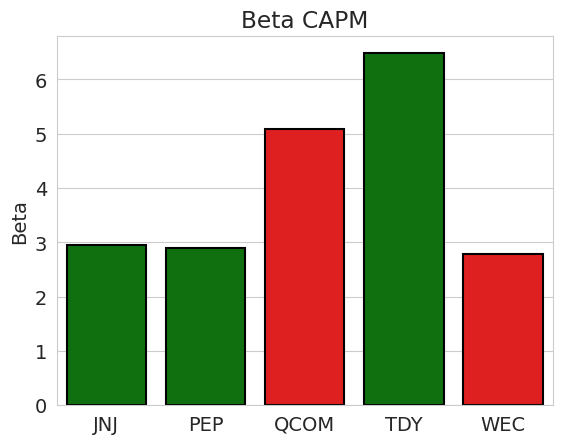

/tmp/ipykernel_12508/430676106.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= linear_reg.loc["Alpha"],edgecolor="black",palette = Color_Alpha,linewidth=1.5)


['green', 'green', 'red', 'green', 'red']

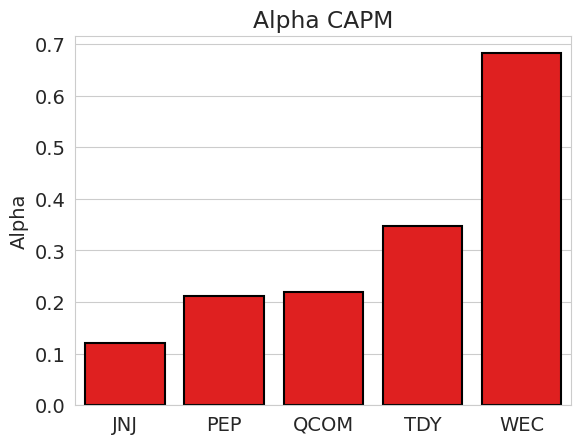

In [26]:
 # Se statisticamente significativo è verde altrimenti rosso 
Color_Beta = ["red" if value > 0.05 else "green" for value in linear_reg.loc["p_value_beta"]]
Color_Alpha = ["red" if value > 0.05 else "green" for value in linear_reg.loc["p_value_alpha"]]

sns.set_style("whitegrid")
plt.title("Beta CAPM")
sns.barplot(data= linear_reg.loc["Beta"],edgecolor="black",palette = Color_Beta,linewidth=1.5 )
plt.show()
plt.title("Alpha CAPM")
sns.barplot(data= linear_reg.loc["Alpha"],edgecolor="black",palette = Color_Alpha,linewidth=1.5)

Color_Beta